# Tarea 4: Error de sesgo y varianza

## Preparación y vizualizacipon de los datos

In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ilpd_indian_liver_patient_dataset = fetch_ucirepo(id=225)


X = ilpd_indian_liver_patient_dataset.data.features 
y = ilpd_indian_liver_patient_dataset.data.targets

ilpd_indian_liver_patient_dataset.variables

,name,role,type,demographic,description,units,missing_values
0,Age,Feature,Integer,Age,Age of the patient. Any patient whose age exce...,years,no
1,Gender,Feature,Binary,Gender,Gender of the patient,None,no
2,TB,Feature,Continuous,None,Total Bilirubin,None,no
3,DB,Feature,Continuous,None,Direct Bilirubin,None,no
4,Alkphos,Feature,Integer,None,Alkaline Phosphotase,None,no
5,Sgpt,Feature,Integer,None,Alamine Aminotransferase,None,no
6,Sgot,Feature,Integer,None,Aspartate Aminotransferase,None,no
7,TP,Feature,Continuous,None,Total Proteins,None,no
8,ALB,Feature,Continuous,None,Albumin,None,no
9,A/G Ratio,Feature,Continuous,None,Albumin and Globulin Ratio,None,no


In [2]:
descripciones = ilpd_indian_liver_patient_dataset.variables['description']
descripciones

0     Age of the patient. Any patient whose age exce...
1                                 Gender of the patient
2                                       Total Bilirubin
3                                      Direct Bilirubin
4                                  Alkaline Phosphotase
5                              Alamine Aminotransferase
6                            Aspartate Aminotransferase
7                                        Total Proteins
8                                               Albumin
9                            Albumin and Globulin Ratio
10    Selector field used to split the data into two...
Name: description, dtype: object

In [3]:
descripciones[0], descripciones[10]

('Age of the patient. Any patient whose age exceeded 89 is listed as being of age "90".',
 'Selector field used to split the data into two sets (labeled by the experts)')

In [41]:
df = ilpd_indian_liver_patient_dataset.data.original
df#.head(10)

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [5]:
df.describe()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


## Outliers

<Axes: >

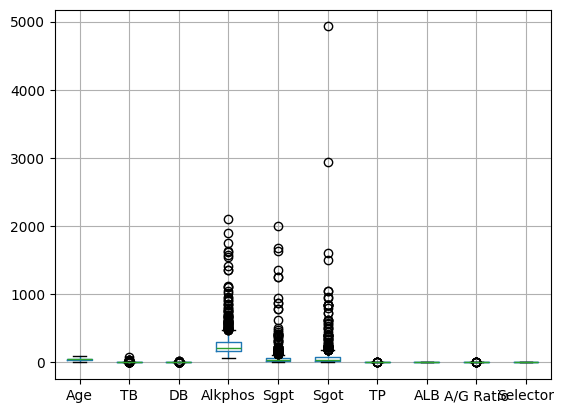

In [6]:
df.boxplot()

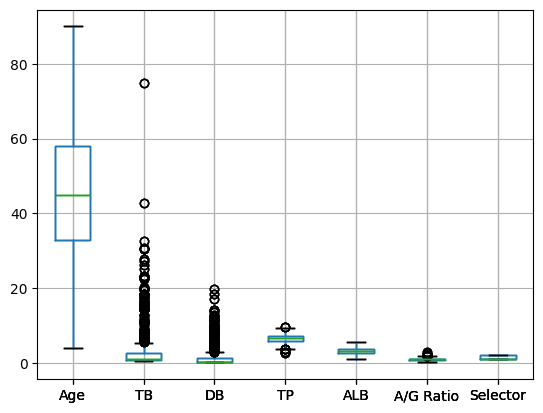

In [19]:
df.drop(['Alkphos', 'Sgpt', 'Sgot'], axis = 1).boxplot();
plt.show()

In [43]:
df = df[df['Sgot'] <= 83]
df = df[df['Alkphos'] <= 147]
# df == df[df['Sgpt'] <= 154]
# df.boxplot(figsize = (16, 8))
plt.show()
len(df)

45

In [8]:
# na_desc = df[df['A/G Ratio'].isna()].describe().loc['mean']
# na_desc

In [9]:
# for c in df.columns:
#     na = df[c].isnull().sum()
#     if na > 0:
#         print(f'{c} tiene {na} valores faltantes')

In [10]:
# gral_desc = df.describe().loc[['mean', 'min', '50%', 'max', 'std']]
# gral_desc

In [11]:
media = X['A/G Ratio'].mean()
media

np.float64(0.9470639032815197)

In [12]:
# for c in X.columns:
#     na = X[c].isnull().sum()
#     if na > 0:
#         print(f'{c} tiene {na} valores faltantes')

Como se puede observar en estas últimas columnas existian solo 4 datos faltantes de 